<a href="https://colab.research.google.com/github/MADASRIKANTH/Brainwave_Matrix_Intern/blob/main/Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
data = pd.read_csv('/content/training.1600000.processed.noemoticon.csv', encoding='latin-1')
data.head()

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [ ]:
data.shape

(1599999, 6)

In [ ]:
column_names = ['target','ids','date','flag','user','text']
data.columns = column_names
data.head()

,target,ids,date,flag,user,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [ ]:
data.shape

(1599999, 6)

In [ ]:
data.isnull().sum()

,0
target,0
ids,0
date,0
flag,0
user,0
text,0


In [ ]:
data['target'].value_counts()

,count
target,
4,800000
0,799999


In [ ]:

data['target'] = (data['target'].replace(4,1))

In [ ]:
data['target'].value_counts()

,count
target,
1,800000
0,799999


In [ ]:
port_stemmer = PorterStemmer()
def stemming(content):
  stemmed_content = re.sub('[^a-zA-Z]',' ',content)
  stemmed_content = stemmed_content.lower()
  stemmed_content = stemmed_content.split()
  stemmed_content = [port_stemmer.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
  stemmed_content = " ".join(stemmed_content)
  return stemmed_content

In [ ]:
data['stemmed_content'] = data['text'].apply(stemming)
data.head()

,target,ids,date,flag,user,text,stemmed_content
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,upset updat facebook text might cri result sch...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,kenichan dive mani time ball manag save rest g...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,whole bodi feel itchi like fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",nationwideclass behav mad see
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew,kwesidei whole crew


In [ ]:
x = data['stemmed_content'].values
y = data['target'].values

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 2)


In [ ]:
x_train

array(['x dimitra want hate thing chang', 'love weekend',
       'almost forgot free comic book day work comic shop occasion oop thank twitter',
       ..., 'snw mean gotta go ts chang top nah plumbbob',
       'jacki aww lucki get ahah enclosur sure mum want us kill',
       'good knee non reconstruct one kill today must ceilidh drive back devon old age boo'],
      dtype=object)

In [ ]:
sri = TfidfVectorizer()
x_train = sri.fit_transform(x_train)
x_test = sri.transform(x_test)

In [ ]:
print(x_train)

  (0, 101428)	0.776106511775454
  (0, 435323)	0.25795527704002896
  (0, 160320)	0.3121253833533031
  (0, 405465)	0.30300944435328037
  (0, 66697)	0.3766706507364339
  (1, 241501)	0.5940640998201837
  (1, 437481)	0.8044177057380294
  (2, 12095)	0.23036388773072908
  (2, 136138)	0.24374957067347808
  (2, 137887)	0.2309633029863662
  (2, 78963)	0.6392177656235684
  (2, 47931)	0.2285282845469903
  (2, 93796)	0.13649957077984357
  (2, 444838)	0.143958429400076
  (2, 365159)	0.23006205656971884
  (2, 297569)	0.3706694800198963
  (2, 302597)	0.29708219091176463
  (2, 399829)	0.15725437757061775
  (2, 420103)	0.17516479966347792
  (3, 353954)	0.26672998005063203
  (3, 170022)	0.2539587120476497
  (3, 21200)	0.31953329131967634
  (3, 374815)	0.25983295391455086
  (3, 48723)	0.3790033032810089
  (3, 452673)	0.23991670863233922
  :	:
  (1279997, 145761)	0.15067635461289217
  (1279997, 426316)	0.2315013437683727
  (1279997, 389356)	0.22933005079949148
  (1279997, 29233)	0.253223814728876
  (127999

In [ ]:
print(x_test)

  (0, 238941)	0.6611169012045865
  (0, 305131)	0.7502829086029115
  (1, 46938)	0.24896642144882386
  (1, 87246)	0.2283471687035124
  (1, 329311)	0.6509327640904513
  (1, 366062)	0.26537452781583426
  (1, 389196)	0.2327980834665436
  (1, 405538)	0.15068271279127404
  (1, 408228)	0.14238537514191302
  (1, 410665)	0.14076273591654068
  (1, 429732)	0.3825470635534146
  (1, 430344)	0.3583377761916227
  (2, 39427)	0.3353005788479845
  (2, 43686)	0.4336876477536153
  (2, 306703)	0.46262714807935423
  (2, 344016)	0.4561481841867324
  (2, 384322)	0.5266815944508151
  (3, 147714)	0.5256513804062938
  (3, 227488)	0.450786678026413
  (3, 244243)	0.5936823444687139
  (3, 301409)	0.409906417438176
  (4, 53730)	0.3664529461576803
  (4, 130334)	0.4111857480428709
  (4, 151557)	0.2390261351083934
  (4, 169571)	0.42011740190609803
  :	:
  (319997, 71183)	0.2892249641449673
  (319997, 150453)	0.22900684128491267
  (319997, 234205)	0.14594340536999928
  (319997, 241798)	0.45700094037448075
  (319997, 2530

In [ ]:
model = LogisticRegression(max_iter = 1000)
model.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [ ]:
y_predict = model.predict(x_train)
accuracy = accuracy_score(y_predict,y_train)

In [ ]:
accuracy

0.8047529724632597

In [ ]:

model = LogisticRegression(max_iter = 1000)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.778340625

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           0       0.79      0.76      0.77    160041
           1       0.77      0.80      0.78    159959

    accuracy                           0.78    320000
   macro avg       0.78      0.78      0.78    320000
weighted avg       0.78      0.78      0.78    320000



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


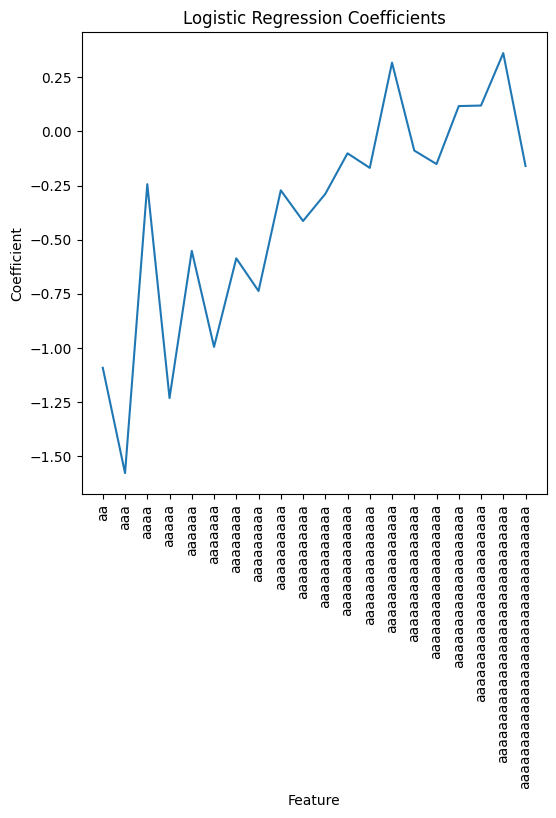

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import plot_tree
model = LogisticRegression()
model.fit(x_train, y_train)
plt.figure(figsize=(6, 6))
feature_names = sri.get_feature_names_out()
plt.plot(feature_names[:20], model.coef_[0][:20])
plt.xticks(rotation = 90)
plt.xlabel("Feature")
plt.ylabel("Coefficient")
plt.title("Logistic Regression Coefficients")

plt.show()

In [ ]:
import pickle
filename = 'trained_model.sav'
pickle.dump(model, open(filename, 'wb'))


In [ ]:
loaded_model = pickle.load(open('/content/trained_model.sav', 'rb'))

In [ ]:
x_new = x_test[200]
print(y_test[200])
prediction = model.predict(x_new)
print(prediction)

if prediction[0]==1:
  print('Positive')
else:
  print('Negative')

1
[1]
Positive
